In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('Searches'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


Searches\desktop.ini
Searches\dictionary.png
Searches\Everywhere.search-ms
Searches\ifood_df.csv
Searches\Indexed Locations.search-ms


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(r"C:\Users\HP\Downloads\ifood_df.csv")
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [6]:
df.shape

(2205, 39)

In [7]:
# check duplicate
df.duplicated().sum()

184

In [8]:
df[df.duplicated()].head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
77,38620.0,0,0,56,112,17,44,34,22,89,...,1,0,0,0,0,1,0,229,140,0
167,78497.0,0,0,44,207,26,447,75,0,223,...,0,0,1,0,0,0,0,755,532,1
267,51369.0,0,1,84,297,7,79,0,11,182,...,1,0,0,0,1,0,0,394,212,0
268,37760.0,0,0,20,84,5,38,150,12,28,...,1,0,0,0,1,0,0,289,261,0
346,37717.0,1,0,31,9,0,6,4,1,5,...,0,0,0,0,0,0,1,20,15,0


In [9]:
# check missing value
df.isnull().sum().sum()

0

In [10]:
# check features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [11]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [12]:
df['marital_Single'].replace(1,2, inplace=True)
df['marital_Together'].replace(1,3, inplace=True)
df['marital_Widow'].replace(1,4, inplace=True)
df['marital_Divorced'].replace(1,5, inplace=True)

In [13]:
df['marital_Status'] = df['marital_Married']+df['marital_Single']+df['marital_Together']+df['marital_Divorced']+df['marital_Widow']
df['marital_Status'] = df['marital_Status'].map({1:'married',2:'single',3:'together',4:'widow',5:'divorced'})

In [14]:
df.drop(['marital_Married','marital_Single','marital_Divorced','marital_Together','marital_Widow'], axis=1, inplace=True)
df['marital_Status'].unique()

array(['single', 'together', 'married', 'divorced', 'widow'], dtype=object)

In [15]:
df['education_Basic'].replace(1,2, inplace=True)
df['education_Graduation'].replace(1,3, inplace=True)
df['education_Master'].replace(1,4, inplace=True)
df['education_PhD'].replace(1,5, inplace=True)

In [16]:
df['education_Status'] = df['education_2n Cycle']+df['education_Basic']+df['education_Graduation']+df['education_Master']+df['education_PhD']
df['education_Status'] = df['education_Status'].map({1:'2n cycle',2:'basic', 3:'graduation', 4:'master', 5:'phd'})

In [17]:
df.drop(['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD'], axis=1, inplace=True)
df['education_Status'].unique()

array(['graduation', 'phd', 'master', 'basic', '2n cycle'], dtype=object)

In [18]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall', 'marital_Status', 'education_Status'],
      dtype='object')

In [19]:
df['total_kid'] = df['Kidhome'] + df['Teenhome']
df.drop(['Kidhome','Teenhome'],axis=1,inplace=True)

In [24]:
df['Frequency'] = df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']

In [25]:
df.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Response,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_Status,education_Status,total_kid,Frequency
0,58138.0,58,635,88,546,172,88,88,3,8,...,1,63,2822,1529,1441,0,single,graduation,0,22
1,46344.0,38,11,1,6,2,1,6,2,1,...,0,66,2272,21,15,0,single,graduation,2,4
2,71613.0,26,426,49,127,111,21,42,1,8,...,0,55,2471,734,692,0,together,graduation,0,20
3,26646.0,26,11,4,20,10,3,5,2,2,...,0,36,2298,48,43,0,together,graduation,1,6
4,58293.0,94,173,43,118,46,27,15,5,5,...,0,39,2320,407,392,0,married,phd,1,14


Text(0.5, 1.0, 'Recency')

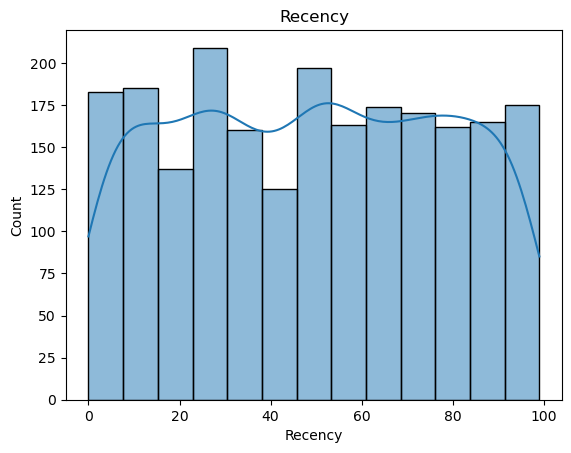

In [26]:
sns.histplot(df['Recency'], kde=True)
plt.title('Recency')

Text(0.5, 1.0, 'Frequency')

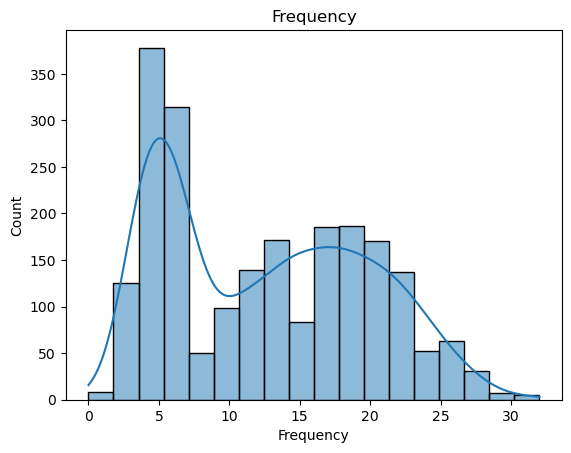

In [27]:
sns.histplot(df['Frequency'], kde=True)
plt.title('Frequency')

Text(0.5, 1.0, 'Monetary')

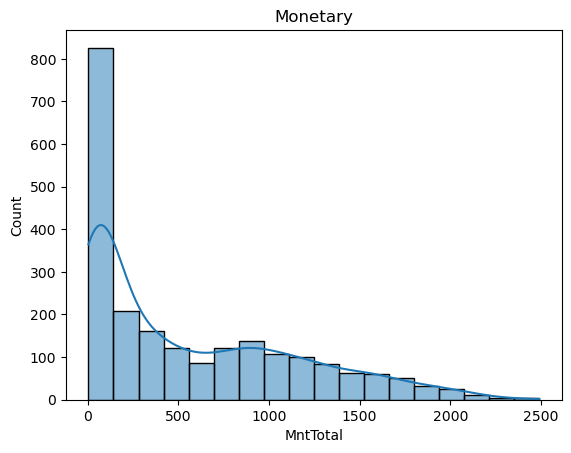

In [28]:
sns.histplot(df['MntTotal'], kde=True)
plt.title('Monetary')

In [29]:
RQ = pd.qcut(df['Recency'], q=4, labels=[4,3,2,1]) # the lowest the recency the better
MQ = pd.qcut(df['MntTotal'], q=4, labels=[1,2,3,4])
FQ = pd.qcut(df['Frequency'], q=4, labels=[1,2,3,4])

In [30]:
df = df.assign(RQ=RQ.values,FQ=FQ.values,MQ=MQ.values)

In [31]:
df[['Recency','RQ','Frequency','FQ','MntTotal','MQ']].head()

,Recency,RQ,Frequency,FQ,MntTotal,MQ
0,58,2,22,4,1529,4
1,38,3,4,1,21,1
2,26,3,20,4,734,3
3,26,3,6,1,48,1
4,94,1,14,3,407,3


In [32]:
df['RFMQ'] = df[['RQ','FQ','MQ']].sum(axis=1)

In [33]:
df['RFMQ'].head()

0    10
1     5
2    10
3     5
4     7
Name: RFMQ, dtype: int64

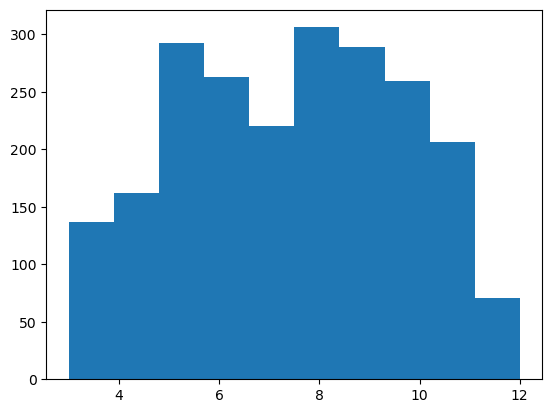

In [34]:
plt.hist(df['RFMQ']);

In [35]:
df['RFMQ']

0       10
1        5
2       10
3        5
4        7
        ..
2200    10
2201     8
2202     8
2203    11
2204     7
Name: RFMQ, Length: 2205, dtype: int64

In [36]:
df['cluster_rfm'] = pd.qcut(df['RFMQ'], q=4, labels=[0,1,2,3])

In [38]:
import plotly.graph_objects as go
import plotly.express as px

rfm_cluster = df[['Recency','Frequency','MntTotal','cluster_rfm']]
# Create the scatter plot
fig = px.scatter_3d(rfm_cluster, x='Recency', y='Frequency', z='MntTotal', color=rfm_cluster['cluster_rfm'],
                   labels={'0':'Recency','1':'Frequency','2':'Monetary'})

# Show the figure
fig.show()

<Axes: xlabel='cluster_rfm'>

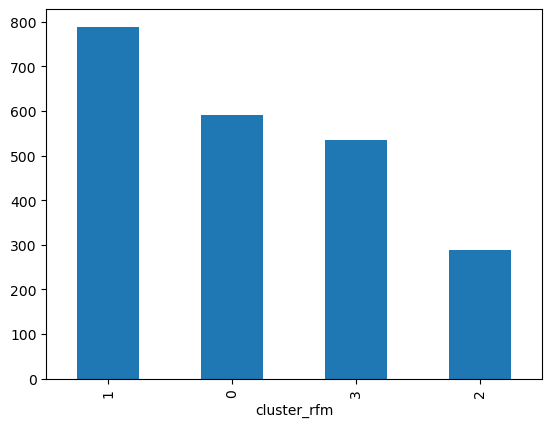

In [39]:
df['cluster_rfm'].value_counts().plot.bar()

<Axes: xlabel='Age', ylabel='Density'>

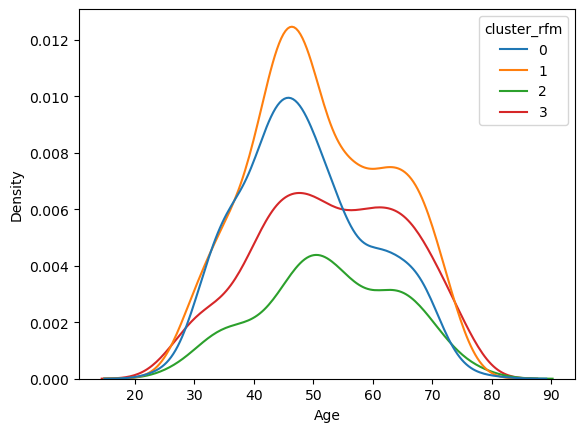

In [40]:
sns.kdeplot(data=df, x='Age', hue='cluster_rfm')

<Axes: xlabel='MntTotal', ylabel='Income'>

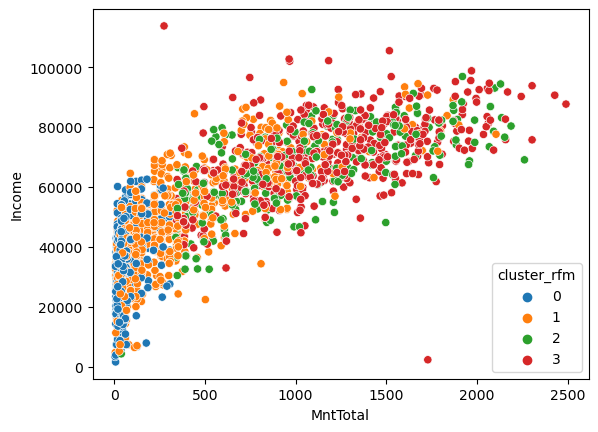

In [41]:
sns.scatterplot(data=df, x='MntTotal', y='Income', hue='cluster_rfm')

<Axes: xlabel='cluster_rfm', ylabel='count'>

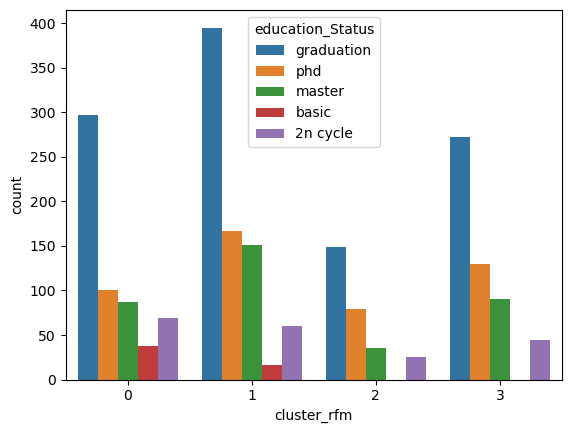

In [42]:
sns.countplot(data=df, x='cluster_rfm', hue='education_Status')

<Axes: xlabel='cluster_rfm', ylabel='count'>

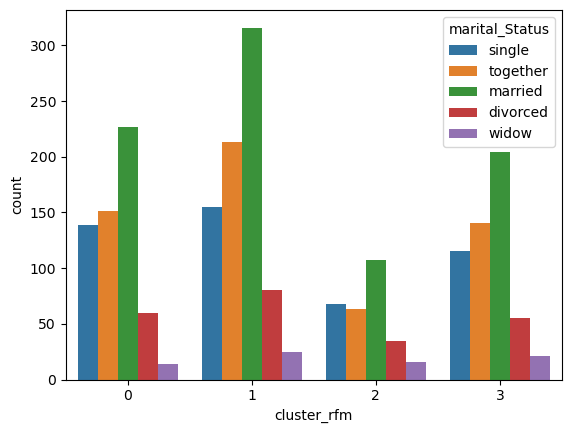

In [43]:
sns.countplot(data=df, x='cluster_rfm', hue='marital_Status')


<Axes: xlabel='cluster_rfm', ylabel='count'>

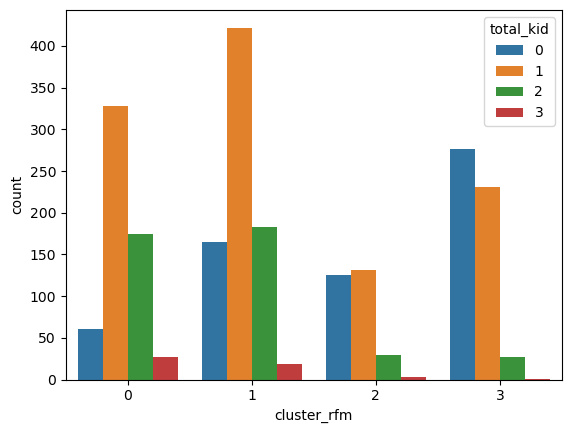

In [44]:
sns.countplot(df, x='cluster_rfm', hue='total_kid')

In [45]:
df.columns

Index(['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age',
       'Customer_Days', 'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall',
       'marital_Status', 'education_Status', 'total_kid', 'Frequency', 'RQ',
       'FQ', 'MQ', 'RFMQ', 'cluster_rfm'],
      dtype='object')

In [46]:
df_pca = df[['Income', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall', 'marital_Status', 'education_Status', 'Frequency',
       'total_kid']]

In [47]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               2205 non-null   float64
 1   Recency              2205 non-null   int64  
 2   MntWines             2205 non-null   int64  
 3   MntFruits            2205 non-null   int64  
 4   MntMeatProducts      2205 non-null   int64  
 5   MntFishProducts      2205 non-null   int64  
 6   MntSweetProducts     2205 non-null   int64  
 7   MntGoldProds         2205 non-null   int64  
 8   NumDealsPurchases    2205 non-null   int64  
 9   NumWebPurchases      2205 non-null   int64  
 10  NumCatalogPurchases  2205 non-null   int64  
 11  NumStorePurchases    2205 non-null   int64  
 12  NumWebVisitsMonth    2205 non-null   int64  
 13  AcceptedCmp3         2205 non-null   int64  
 14  AcceptedCmp4         2205 non-null   int64  
 15  AcceptedCmp5         2205 non-null   i

In [48]:
def ohe_cols(df):
    object_columns = df.select_dtypes(include=['object']).columns

    df_encoded = pd.get_dummies(df, columns=object_columns)

    return df_encoded

In [49]:
df_pca = ohe_cols(df_pca)

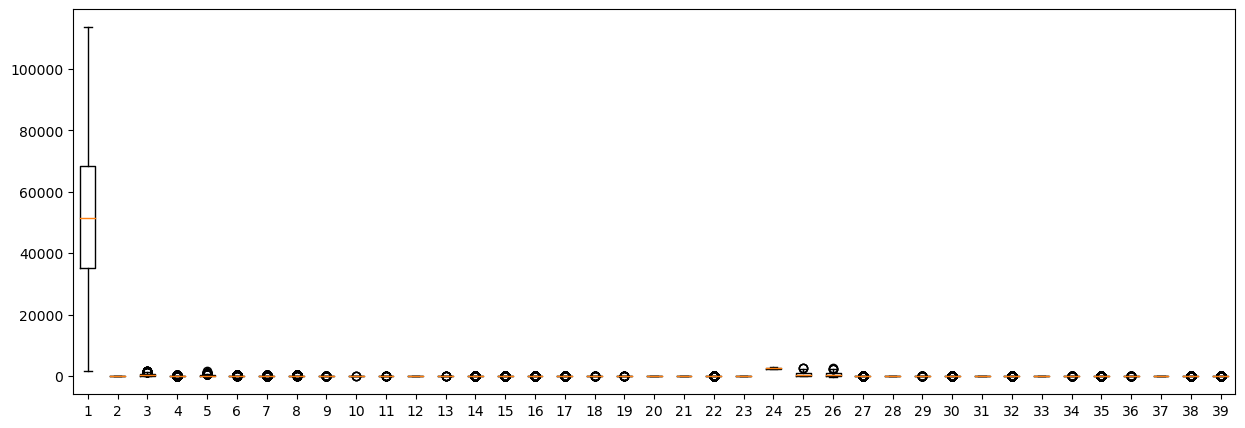

In [50]:
plt.figure(figsize=(15,5))
plt.boxplot(df_pca);

In [51]:
# normalization > z-normalization
from sklearn.preprocessing import StandardScaler

In [52]:
scaler = StandardScaler()

In [53]:
df_pca_norm = scaler.fit_transform(df_pca)
df_pca_norm = pd.DataFrame(df_pca_norm)
df_pca_norm

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,0.314651,0.310830,0.974566,1.548614,1.748400,2.449154,1.480301,0.849556,0.361479,1.424772,...,-0.341256,-0.795062,1.903324,-0.589047,-0.188938,-0.314093,-0.158444,0.990521,-0.444656,-0.524694
1,-0.254877,-0.380600,-0.874776,-0.638664,-0.731678,-0.652345,-0.635399,-0.735767,-0.168834,-1.132957,...,-0.341256,-0.795062,1.903324,-0.589047,-0.188938,-0.314093,-0.158444,0.990521,-0.444656,-0.524694
2,0.965354,-0.795458,0.355155,0.568110,-0.175957,1.336263,-0.149031,-0.039771,-0.699147,1.424772,...,-0.341256,-0.795062,-0.525397,1.697658,-0.188938,-0.314093,-0.158444,0.990521,-0.444656,-0.524694
3,-1.206087,-0.795458,-0.874776,-0.563241,-0.667380,-0.506392,-0.586763,-0.755100,-0.168834,-0.767567,...,-0.341256,-0.795062,-0.525397,1.697658,-0.188938,-0.314093,-0.158444,0.990521,-0.444656,-0.524694
4,0.322136,1.555404,-0.394659,0.417263,-0.217292,0.150396,-0.003121,-0.561768,1.422105,0.328602,...,-0.341256,1.257763,-0.525397,-0.589047,-0.188938,-0.314093,-0.158444,-1.009570,-0.444656,1.905873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,0.463624,-0.104028,1.193879,0.417263,0.076644,0.077420,2.209853,3.923536,-0.168834,1.790162,...,-0.341256,1.257763,-0.525397,-0.589047,-0.188938,-0.314093,-0.158444,0.990521,-0.444656,-0.524694
2201,0.598401,0.241687,0.295881,-0.663806,-0.621452,-0.688833,-0.659718,-0.697100,2.482731,1.424772,...,-0.341256,-0.795062,-0.525397,1.697658,-0.188938,-0.314093,-0.158444,-1.009570,-0.444656,1.905873
2202,0.258780,1.451690,1.783653,0.542969,0.237389,-0.105022,-0.367897,-0.387769,-0.699147,-0.767567,...,2.930351,-0.795062,-0.525397,-0.589047,-0.188938,-0.314093,-0.158444,0.990521,-0.444656,-0.524694
2203,0.851004,-1.417746,0.361082,0.090428,0.223611,0.770696,0.069834,0.327560,-0.168834,0.693992,...,-0.341256,-0.795062,-0.525397,1.697658,-0.188938,-0.314093,-0.158444,-1.009570,2.248931,-0.524694


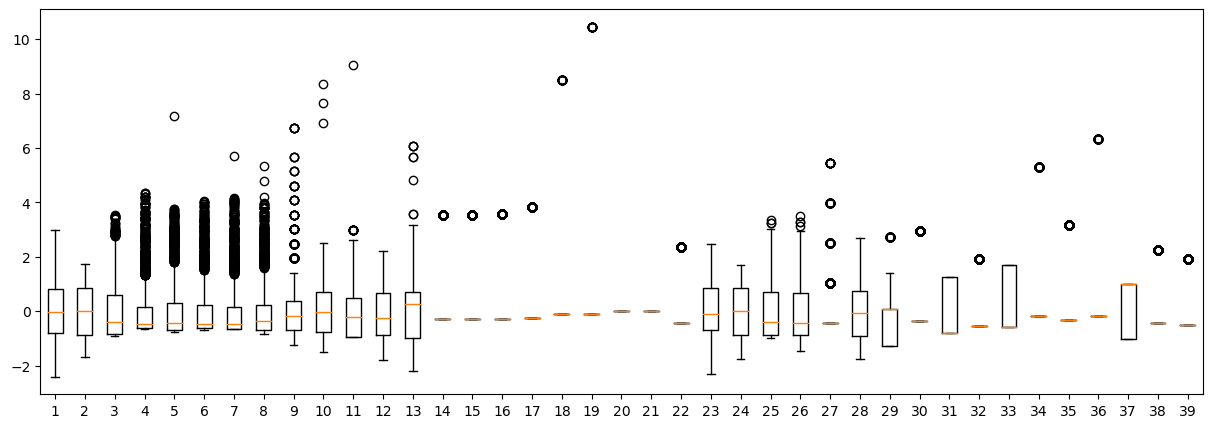

In [54]:
plt.figure(figsize=(15,5))
plt.boxplot(df_pca_norm);

In [55]:
from sklearn.decomposition import PCA

In [56]:
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_pca_norm)
df_pca = pd.DataFrame(df_pca)
df_pca.head()

,0,1,2
0,4.622217,-1.446714,0.229087
1,-3.015862,0.019550,-0.975542
2,1.825422,-1.651103,-0.176574
3,-2.942265,-0.042391,-1.240025
4,-0.386801,-0.659964,0.825449


In [57]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def find_optimal_k_elbow(data, max_clusters=10):
    inertias = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=2023)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)

    # Plot the elbow curve
    plt.plot(range(1, max_clusters + 1), inertias, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia (Within-cluster Sum of Squares)')
    plt.title('Elbow Method')
    plt.show()

# Silhouette Analysis to find the optimal number of clusters
def find_optimal_k_silhouette(data, max_clusters=10):
    silhouette_scores = []
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=2023)
        labels = kmeans.fit_predict(data)
        silhouette_scores.append(silhouette_score(data, labels))

    # Plot the silhouette scores
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Analysis')
    plt.show()

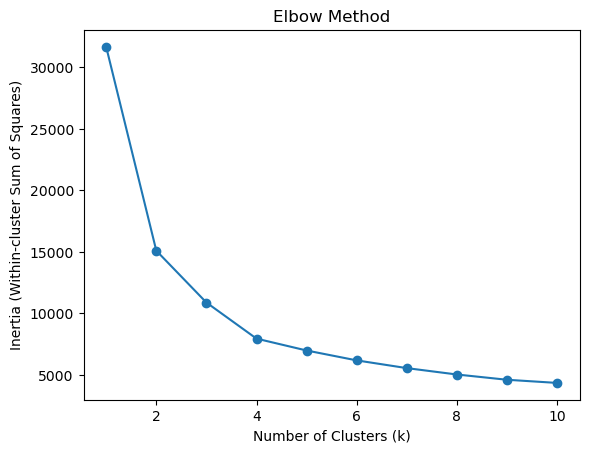

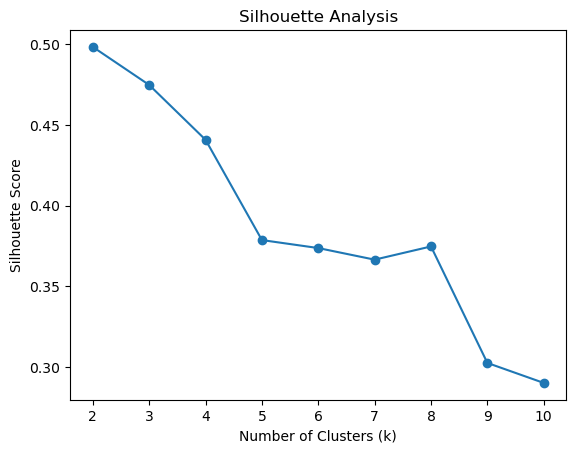

In [58]:
find_optimal_k_elbow(df_pca)
find_optimal_k_silhouette(df_pca)

In [59]:
kmeans = KMeans(n_clusters = 4, n_init=10)
kmeans.fit(df_pca)

KMeans(n_clusters=4, n_init=10)

In [60]:
kmeans.cluster_centers_

array([[ 5.80079013,  3.73868061, -0.68844768],
       [-2.72719639,  0.26562497, -0.51838859],
       [ 3.42667717, -1.38079602, -0.51873776],
       [ 0.2522408 , -0.20859062,  1.6819794 ]])

In [61]:
df_pca['cluster'] = kmeans.labels_

In [62]:
df_pca

,0,1,2,cluster
0,4.622217,-1.446714,0.229087,2
1,-3.015862,0.019550,-0.975542,1
2,1.825422,-1.651103,-0.176574,2
3,-2.942265,-0.042391,-1.240025,1
4,-0.386801,-0.659964,0.825449,3
...,...,...,...,...
2200,2.366869,-1.758073,0.574117,2
2201,-0.408873,1.811124,3.312231,3
2202,2.436108,1.025621,-0.122161,2
2203,1.806649,-1.357610,0.774411,2


In [63]:
import plotly.graph_objects as go
import plotly.express as px
import numpy as np

# Create the scatter plot
fig = px.scatter_3d(df_pca, x=0, y=1, z=2, color=df_pca['cluster'],
                   labels={'0':'0','1':'1','2':'2'})

# Show the figure
fig.show()

<Axes: xlabel='cluster_kmeans'>

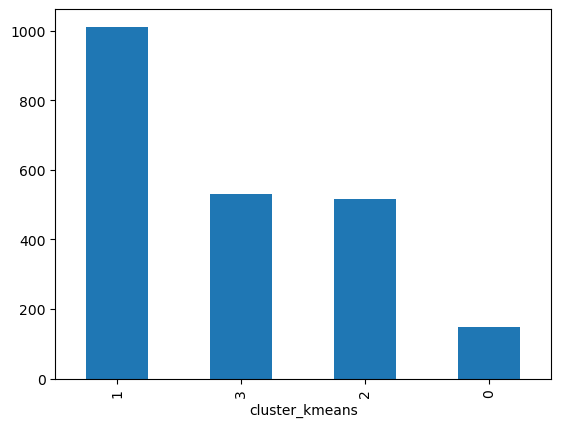

In [64]:
# assign the cluster into original dataset
df['cluster_kmeans'] = df_pca['cluster']


df['cluster_kmeans'].value_counts().plot.bar()

<Axes: xlabel='Age', ylabel='Density'>

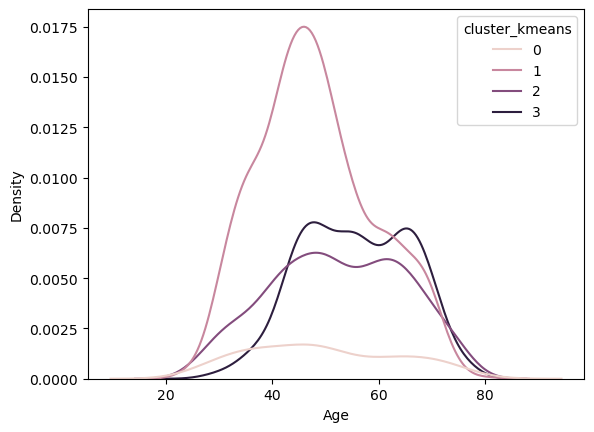

In [65]:
sns.kdeplot(df, x='Age', hue='cluster_kmeans')

<Axes: xlabel='MntTotal', ylabel='Income'>

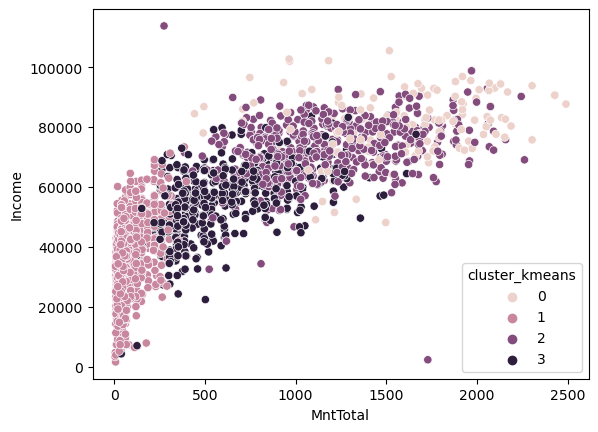

In [66]:
sns.scatterplot(df, y='Income', x='MntTotal', hue='cluster_kmeans')

<Axes: xlabel='cluster_kmeans', ylabel='count'>

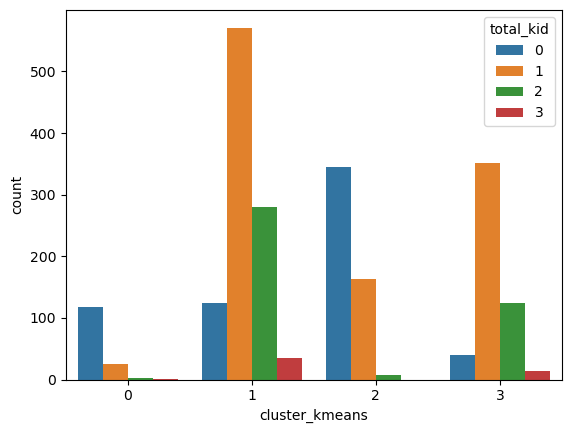

In [67]:
sns.countplot(data=df, x='cluster_kmeans', hue='total_kid')